## READ ME

Name: Kim, Minjun

Student ID: 20195024

Instructions: Please run the cells one by one. This is because the variable used in the previous cell is also used in the later cell.

***

### ML/DL HW3 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)
  * LocationID csv data : [Download](https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/taxi_zones.csv)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

4. Note: You can change the structure of the code or change the logic as needed.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb


### 1. Setup environment and upload dataset files
Install the required libraries. Also, upload New York taxi data files to Colab.

In [253]:
# I ran the code though vscode, so if you want to run it with google-colab, you can use the following command
'''
!pip install pandas pyarrow
import numpy as np
import pandas as pd
from google.colab import files
files=files.upload()
'''

'\n!pip install pandas pyarrow\nimport numpy as np\nimport pandas as pd\nfrom google.colab import files\nfiles=files.upload()\n'

In [345]:
import numpy as np
import pandas as pd

In [346]:
import pyarrow.parquet as pq
df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()

In [347]:
df_train.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
71509,2,2023-01-23 23:13:59,2023-01-23 23:36:04,1.0,10.48,1.0,N,70,61,2,42.2,1.0,0.5,0.00,0.00,1.0,45.95,0.0,1.25
71510,2,2023-01-23 23:57:55,2023-01-24 00:37:38,1.0,17.65,2.0,N,132,163,1,70.0,0.0,0.5,22.20,0.00,1.0,97.45,2.5,1.25
71511,2,2023-01-23 23:24:38,2023-01-23 23:48:41,1.0,12.12,1.0,N,70,142,1,47.8,6.0,0.5,13.12,6.55,1.0,78.72,2.5,1.25
71512,2,2023-01-23 23:04:04,2023-01-23 23:12:30,1.0,1.64,1.0,N,68,163,2,10.7,1.0,0.5,0.00,0.00,1.0,15.70,2.5,0.00
71513,2,2023-01-23 23:59:02,2023-01-24 00:12:46,1.0,4.03,1.0,N,43,68,2,19.1,1.0,0.5,0.00,0.00,1.0,24.10,2.5,0.00


In [348]:
df_test.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
28385,1,2023-01-31 22:32:00,2023-01-31 22:49:41,NaN,0.00,NaN,None,144,143,0,13.00,1.0,0.5,0.00,0.0,1.0,20.00,NaN,NaN
28386,2,2023-01-31 22:27:39,2023-01-31 22:45:27,NaN,4.56,NaN,None,186,238,0,20.00,0.0,0.5,4.80,0.0,1.0,28.80,NaN,NaN
28387,2,2023-01-31 22:40:00,2023-01-31 22:58:00,NaN,4.34,NaN,None,68,236,0,20.88,0.0,0.5,2.49,0.0,1.0,27.37,NaN,NaN
28388,1,2023-01-31 23:18:36,2023-01-31 23:27:44,NaN,0.00,NaN,None,48,229,0,3.90,0.0,0.5,0.00,0.0,1.0,7.90,NaN,NaN
28389,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.0,0.5,3.96,0.0,1.0,23.76,NaN,NaN


In [349]:
df_train.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [350]:
taxi_zones = pd.read_csv('taxi_zones.csv')
print(len(taxi_zones))
taxi_zones.tail(5)
# LocationID = PULocationID = DOLocationID (264, 265 = Unknown)

263


,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,Latitude,Longitude
258,1.023962e+06,266878.034018,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,42.307797,-96.930286
259,1.010930e+06,211369.883417,260,0.133514,0.000422,Woodside,260,Queens,37.429939,-122.253856
260,9.806682e+05,197575.689861,261,0.027120,0.000034,World Trade Center,261,Manhattan,36.375484,-81.758240
261,9.992531e+05,222193.818758,262,0.049064,0.000122,Yorkville East,262,Manhattan,43.112850,-75.271000
262,9.977632e+05,222907.634704,263,0.037017,0.000066,Yorkville West,263,Manhattan,31.759903,-97.102936


### 2.1. Calculate and assign new columns to the dataframe [3 pts]
Make weekday, month and pickup_hour which will help us to gain more insights from the data.

In [351]:
# Change to 'datetime' data type
df_train['tpep_pickup_datetime'] = pd.to_datetime(df_train['tpep_pickup_datetime'])
df_train['tpep_dropoff_datetime'] = pd.to_datetime(df_train['tpep_dropoff_datetime'])

# Calculate and assign new columns to the dataframe such as weekday,
# month and pickup_hour which will help us to gain more insights from the data.
df_train['weekday'] = df_train['tpep_pickup_datetime'].dt.day_name()
df_train['month'] = df_train['tpep_pickup_datetime'].dt.month_name()
df_train['weekday_num'] = df_train['tpep_pickup_datetime'].dt.dayofweek
# I thought that whether it's the weekday or not is also an important feature. 0 for weekend, 1 for weekday.
df_train['weekday'] = df_train['weekday_num'].apply(lambda x: 1 if x < 5 else 0)
df_train['pickup_hour'] = df_train['tpep_pickup_datetime'].dt.hour
df_train['trip_duration'] = (df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']).dt.total_seconds()

In [352]:
print(df_train[['weekday', 'month', 'weekday_num', 'pickup_hour']].tail(5))

       weekday    month  weekday_num  pickup_hour
71509        1  January            0           23
71510        1  January            0           23
71511        1  January            0           23
71512        1  January            0           23
71513        1  January            0           23


In [353]:
print(df_train[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_duration']].tail(5))


      tpep_pickup_datetime tpep_dropoff_datetime  trip_duration
71509  2023-01-23 23:13:59   2023-01-23 23:36:04         1325.0
71510  2023-01-23 23:57:55   2023-01-24 00:37:38         2383.0
71511  2023-01-23 23:24:38   2023-01-23 23:48:41         1443.0
71512  2023-01-23 23:04:04   2023-01-23 23:12:30          506.0
71513  2023-01-23 23:59:02   2023-01-24 00:12:46          824.0


### 2.2 Match places by latitude and longitude [2 pts]

---


Convert the IDs of the boarding and alighting locations to latitude and longitude through the given csv file.

In [354]:
df_train[['PULocationID','DOLocationID']].tail(5)

,PULocationID,DOLocationID
71509,70,61
71510,132,163
71511,70,142
71512,68,163
71513,43,68


In [355]:
print(f"PULocationID ranges from {df_train['PULocationID'].min()} to {df_train['PULocationID'].max()}")
print(f"DOLocationID ranges from {df_train['DOLocationID'].min()} to {df_train['DOLocationID'].max()}")

print(f"LocationID in taxi_zones ranges from {taxi_zones['LocationID'].min()} to {taxi_zones['LocationID'].max()}")

PULocationID ranges from 1 to 265
DOLocationID ranges from 1 to 265
LocationID in taxi_zones ranges from 1 to 263


In [356]:
#I heard that there are duplicated LocationID in taxi_zones data from ED forums.
#Professor said that I can think of it as a noise in the data and handle it accordingly.

# Let's find duplicated 'LocationID'
duplicates = taxi_zones[taxi_zones.duplicated(subset='LocationID', keep=False)]

for index, row in duplicates.iterrows():
    print(f"Index: {index}, LocationID: {row['LocationID']}")


Index: 55, LocationID: 56
Index: 56, LocationID: 56
Index: 102, LocationID: 103
Index: 103, LocationID: 103
Index: 104, LocationID: 103


In [357]:
# Let's edit the duplicated LocationID in taxi_zones.
taxi_zones.at[56, 'LocationID'] = 57
taxi_zones.at[103, 'LocationID'] = 104
taxi_zones.at[104, 'LocationID'] = 105

print(taxi_zones[['LocationID','Latitude','Longitude']].loc[[55, 56, 102, 103, 104]])

     LocationID   Latitude   Longitude
55           56  33.752886 -116.055617
56           57  33.752886 -116.055617
102         103  37.459336  -87.206541
103         104  37.459336  -87.206541
104         105  37.459336  -87.206541


In [358]:
Loc_ID_dic = dict(zip(taxi_zones['LocationID'], taxi_zones[['Latitude', 'Longitude']].values))
#I used dictionary because dictionary is dealing with NaN values. For example, if there are no such key like 264 or 265 in taxi_zones, then it will return NaN.
df_train['PU_latitude'] = df_train['PULocationID'].map(Loc_ID_dic).str[0]
df_train['PU_longitude'] = df_train['PULocationID'].map(Loc_ID_dic).str[1]
df_train['DO_latitude'] = df_train['DOLocationID'].map(Loc_ID_dic).str[0]
df_train['DO_longitude'] = df_train['DOLocationID'].map(Loc_ID_dic).str[1]

### 2.3. Analysis of trip duration and pickup hour [2 pts]

Trip duration is analyzed based on pickup hour. Draw a graph by averaging the trip duration for each pickup hour. \
You can use any library (e.g., seaborn, matplot, pandas, etc) for this part.

(Example)
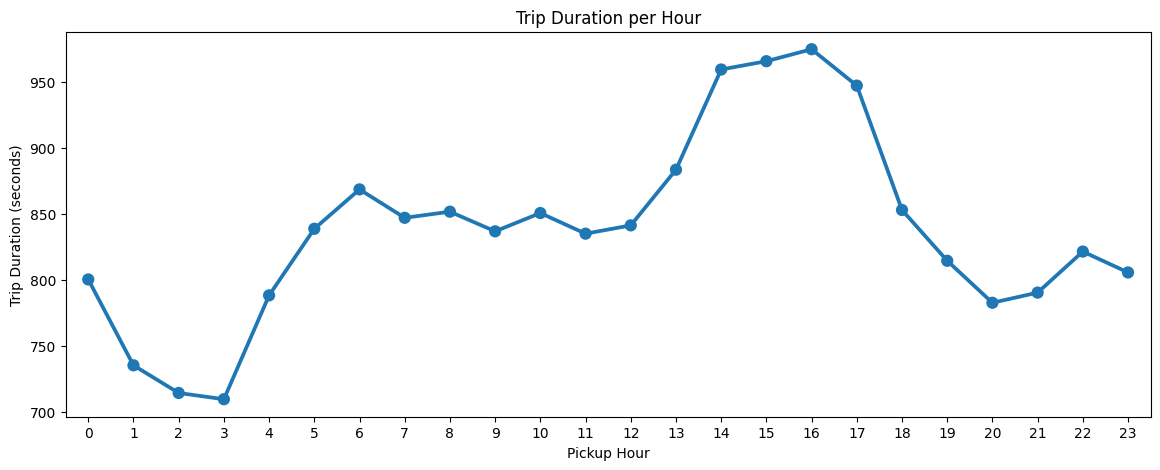

In [359]:
print(df_train[['pickup_hour','trip_duration']].tail(5))

       pickup_hour  trip_duration
71509           23         1325.0
71510           23         2383.0
71511           23         1443.0
71512           23          506.0
71513           23          824.0


In [360]:
#Let's group our data based on 'pickup_hour'.
grouped_by_PUhour = df_train.groupby('pickup_hour')
avg_duration = grouped_by_PUhour['trip_duration'].mean()
avg_duration_per_PUhour = avg_duration.reset_index()

print(avg_duration_per_PUhour)

    pickup_hour  trip_duration
0             0     800.384769
1             1     735.338235
2             2     714.382845
3             3     709.654124
4             4     788.313580
5             5     838.759124
6             6     868.588924
7             7     847.083116
8             8     851.700973
9             9     836.831706
10           10     850.683526
11           11     835.058159
12           12     841.342955
13           13     883.499144
14           14     959.416703
15           15     965.698618
16           16     974.772718
17           17     947.189538
18           18     852.989687
19           19     814.533094
20           20     782.714249
21           21     790.420725
22           22     821.515562
23           23     805.668927


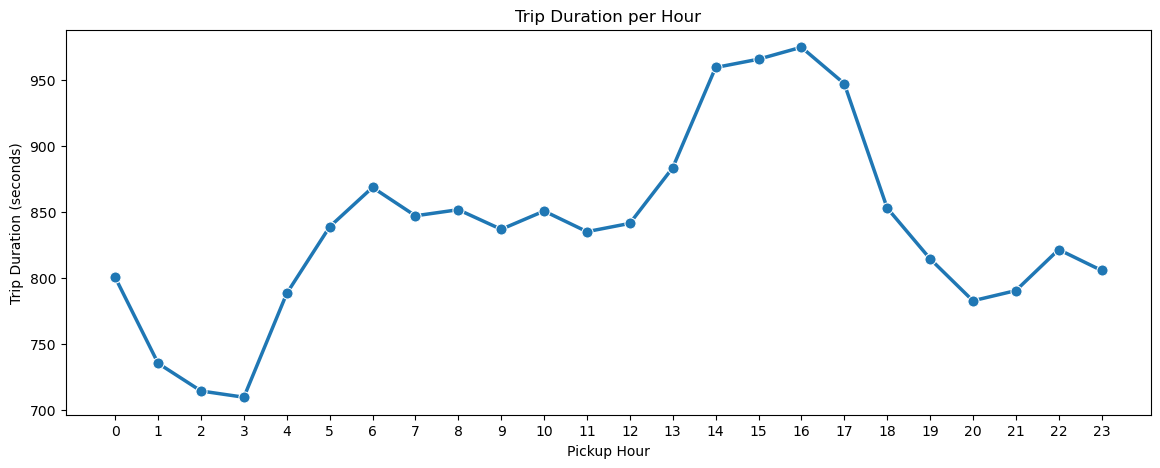

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
sns.lineplot(data=avg_duration_per_PUhour, x='pickup_hour', y='trip_duration', marker="o", linewidth=2.5, markersize=8)

plt.title('Trip Duration per Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration (seconds)')
plt.xticks(range(0,24))

plt.show()

### 2.4. Analysis of trip duration and weekday [2 pts]

Trip duration is analyzed based on what time you boarded. Draw a graph by averaging the trip duration for each weekday. \
You can use (e.g., seaborn, matplot, pandas, etc) for this part.

(Example)
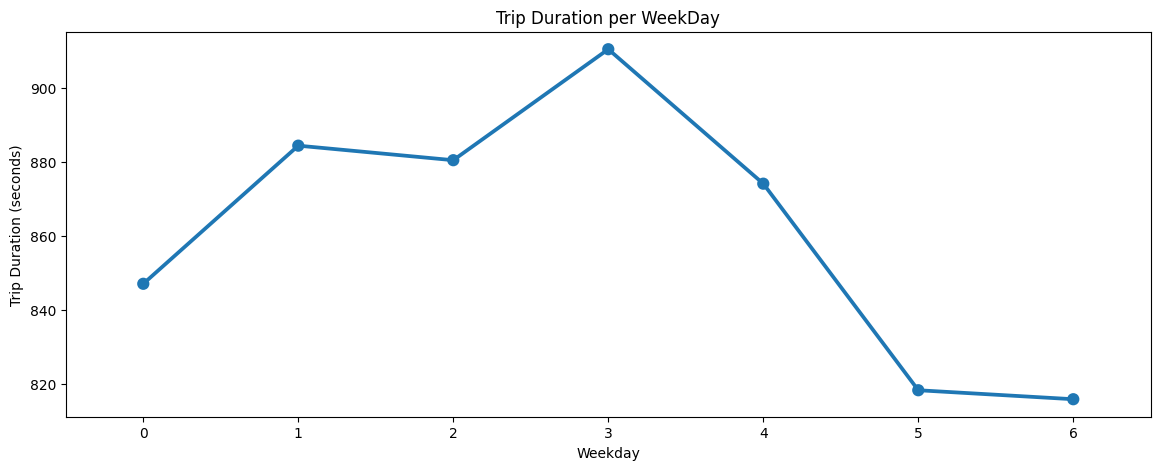

In [362]:
#Let's group our data based on 'weekday_num'.
grouped_by_weekday = df_train.groupby('weekday_num')
avg_duration2 = grouped_by_weekday['trip_duration'].mean()
avg_duration_per_weekday = avg_duration2.reset_index()

In [363]:
print(avg_duration_per_weekday)

   weekday_num  trip_duration
0            0     847.165208
1            1     884.479917
2            2     880.552445
3            3     910.533540
4            4     874.209157
5            5     818.407379
6            6     815.978922


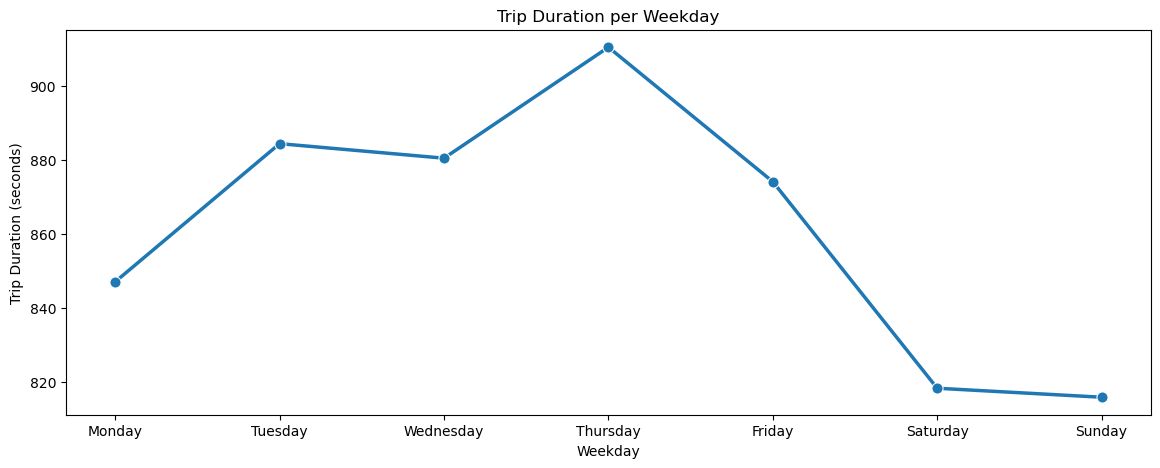

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
sns.lineplot(data=avg_duration_per_weekday, x='weekday_num', y='trip_duration', marker="o", linewidth=2.5, markersize=8)

plt.title('Trip Duration per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Trip Duration (seconds)')
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), weekday_labels)

plt.show()

### 2.5 Visualize pick-up points and drop-off points [3 pts]
Visualize each pick-up points and drop-off points. The x-axis is longitude, and the y-axis is latitude. You can use any library including matplotlib.

(Example visualization)


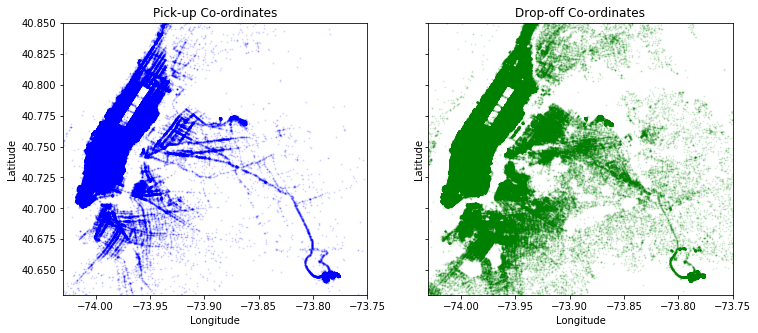

In [365]:
df_train[['PU_longitude',
       'PU_latitude', 'DO_longitude', 'DO_latitude']].tail(5)


,PU_longitude,PU_latitude,DO_longitude,DO_latitude
71509,-73.869969,40.762741,-81.102040,33.615710
71510,-83.290731,35.475594,-81.102040,33.615710
71511,-73.869969,40.762741,-96.823133,40.865142
71512,-71.032830,42.391760,-81.102040,33.615710
71513,-83.027221,42.480186,-71.032830,42.391760


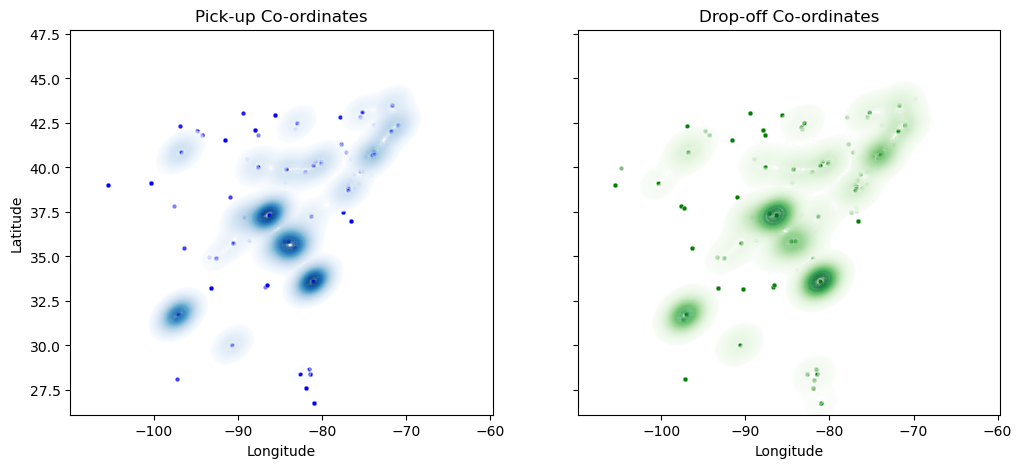

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

#I thought that setting a border with min and max is not good
'''
city_long_border = (df_train['PU_longitude'].min(), df_train['PU_longitude'].max())
city_lat_border = (df_train['PU_latitude'].min(), df_train['PU_latitude'].max())
'''
#So, I decided to make use the mean and standard deviation method to set coordinate boundaries.
long_mean = df_train['PU_longitude'].mean()
long_std = df_train['PU_longitude'].std()
lat_mean = df_train['PU_latitude'].mean()
lat_std = df_train['PU_latitude'].std()

city_long_border = (long_mean - 3*long_std, long_mean + 3*long_std)
city_lat_border = (lat_mean - 3*lat_std, lat_mean + 3*lat_std)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 5))

#I want to show scatterplot as well as density of each points by kdeplot
sns.scatterplot(data=df_train, x='PU_longitude', y='PU_latitude', ax=ax[0], color='blue', s=10, alpha=0.5)
sns.kdeplot(data=df_train, x='PU_longitude', y='PU_latitude', ax=ax[0], cmap="Blues", levels=100, alpha=0.5)
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

sns.scatterplot(data=df_train, x='DO_longitude', y='DO_latitude', ax=ax[1], color='green', s=10, alpha=0.5)
sns.kdeplot(data=df_train, x='DO_longitude', y='DO_latitude', ax=ax[1], cmap="Greens", levels=100, alpha=0.5)
ax[1].set_title('Drop-off Co-ordinates')
ax[1].set_xlim(city_long_border)
ax[1].set_ylim(city_lat_border)
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

plt.show()


### 3.1 Make dataset & preprocessing [2 pts]
Write a code to make dataset. You can use preprocessing as needed.



In [367]:
df_train['fare_amount']

0        17.7
1        23.3
2        13.5
3        32.4
4         5.5
         ... 
71509    42.2
71510    70.0
71511    47.8
71512    10.7
71513    19.1
Name: fare_amount, Length: 71514, dtype: float64

In [368]:
x = df_train.iloc[:, [1]]
x_values=x.values

print(x)
print(x_values)

      tpep_pickup_datetime
0      2023-01-01 00:33:53
1      2023-01-01 00:47:59
2      2023-01-01 00:59:58
3      2023-01-01 00:53:50
4      2023-01-01 00:09:27
...                    ...
71509  2023-01-23 23:13:59
71510  2023-01-23 23:57:55
71511  2023-01-23 23:24:38
71512  2023-01-23 23:04:04
71513  2023-01-23 23:59:02

[71514 rows x 1 columns]
[['2023-01-01T00:33:53.000000000']
 ['2023-01-01T00:47:59.000000000']
 ['2023-01-01T00:59:58.000000000']
 ...
 ['2023-01-23T23:24:38.000000000']
 ['2023-01-23T23:04:04.000000000']
 ['2023-01-23T23:59:02.000000000']]


In [369]:
df_train_info = pd.concat([df_train.isnull().sum(), df_train.dtypes], axis=1)

df_train_info.columns = ['num_of_nulls', 'dtype']

print(df_train_info)

                       num_of_nulls           dtype
VendorID                          0           int64
tpep_pickup_datetime              0  datetime64[ns]
tpep_dropoff_datetime             0  datetime64[ns]
passenger_count                   0         float64
trip_distance                     0         float64
RatecodeID                        0         float64
store_and_fwd_flag                0          object
PULocationID                      0           int64
DOLocationID                      0           int64
payment_type                      0           int64
fare_amount                       0         float64
extra                             0         float64
mta_tax                           0         float64
tip_amount                        0         float64
tolls_amount                      0         float64
improvement_surcharge             0         float64
total_amount                      0         float64
congestion_surcharge              0         float64
airport_fee 

In [370]:
df_test_info = pd.concat([df_test.isnull().sum(), df_test.dtypes], axis=1)

df_test_info.columns = ['num_of_nulls', 'dtype']

print(df_test_info)

                       num_of_nulls           dtype
VendorID                          0           int64
tpep_pickup_datetime              0  datetime64[ns]
tpep_dropoff_datetime             0  datetime64[ns]
passenger_count                2430         float64
trip_distance                     0         float64
RatecodeID                     2430         float64
store_and_fwd_flag             2430          object
PULocationID                      0           int64
DOLocationID                      0           int64
payment_type                      0           int64
fare_amount                       0         float64
extra                             0         float64
mta_tax                           0         float64
tip_amount                        0         float64
tolls_amount                      0         float64
improvement_surcharge             0         float64
total_amount                      0         float64
congestion_surcharge           2430         float64
airport_fee 

In [371]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq

class Dataset:
  train_x = None # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.taxi_zones = pd.read_csv('./taxi_zones.csv')
    
    self.df_train = self.preprocess_data(self.df_train, is_train=True)
    self.df_test = self.preprocess_data(self.df_test, is_train=False)
    self.taxi_zones = self.preprocess_taxi_zones()

  def preprocess_taxi_zones(self):
    self.taxi_zones.at[56, 'LocationID'] = 57
    self.taxi_zones.at[103, 'LocationID'] = 104
    self.taxi_zones.at[104, 'LocationID'] = 105
    return self.taxi_zones

  def preprocess_data(self, df, is_train=True): #I add the term determining whether dt is train or test.
  ### TODO: Preprocess your data, use your preprocessing code above (Impute null values; DO NOT drop any test cases)
 
    #Change to 'datetime' data type
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

    #compute latitudes and longitudes from taxi_zones
    Loc_ID_dic = dict(zip(self.taxi_zones['LocationID'], self.taxi_zones[['Latitude', 'Longitude']].values))
    df['PU_latitude'] = df['PULocationID'].map(Loc_ID_dic).str[0]
    df['PU_longitude'] = df['PULocationID'].map(Loc_ID_dic).str[1]
    df['DO_latitude'] = df['DOLocationID'].map(Loc_ID_dic).str[0]
    df['DO_longitude'] = df['DOLocationID'].map(Loc_ID_dic).str[1]
    
    #for train data, I think applying replacing NaN longitude and NaN latitude to median is really strange, so I decided to drop null values(for LocationID 264 and 265) in train data.
    if is_train: #for train data
      df=df.dropna()
    #Since we cannot drop null values in test data, we replace those with the meidian value.
    #This is replacing NaN value with the median value of each column.
    #I tried to replace all NaN to median, but there were error in test code because we can not apply median() method for string type. So I considered that case.
    else: #for test data
      for col in df.columns:
        if df[col].dtype == 'object':
          pass
        else:
        #The purpose is to fill the missing value (null/NaN) with the median of the column if the data type in each column is not an object(string).
          med = df[col].median()
          df[col].fillna(med, inplace=True)
    
    return df
    


  def getdata_linear_reg(self):
    #I tried to use 'pickup_hour', 'weekday_num', 'trip_duration', and 'longitude', 'latitude' as features
    #And 'fare_amount' is the value we want to predict
    
    #pickup_hour
    self.df_train['pickup_hour'] = self.df_train['tpep_pickup_datetime'].dt.hour
    self.df_test['pickup_hour'] = self.df_test['tpep_pickup_datetime'].dt.hour

    #weekday_num
    self.df_train['weekday_num'] = self.df_train['tpep_pickup_datetime'].dt.dayofweek
    self.df_test['weekday_num'] = self.df_test['tpep_pickup_datetime'].dt.weekday

    #weekday
    self.df_train['weekday'] = self.df_train['weekday_num'].apply(lambda x: 1 if x < 5 else 0)
    self.df_test['weekday'] = self.df_test['weekday_num'].apply(lambda x: 1 if x < 5 else 0)
    
    #trip_duration
    self.df_train['trip_duration'] = (self.df_train['tpep_dropoff_datetime'] - self.df_train['tpep_pickup_datetime']).dt.total_seconds()
    self.df_test['trip_duration'] = (self.df_test['tpep_dropoff_datetime'] - self.df_test['tpep_pickup_datetime']).dt.total_seconds()
        
    #all features that I want to use for X
    feature_list=["PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", "pickup_hour", "trip_duration", "weekday"]
    self.train_x = self.df_train[feature_list].to_numpy()
    self.train_y = self.df_train['fare_amount'].to_numpy()
    self.test_x = self.df_test[feature_list].to_numpy()
    self.test_y = self.df_test['fare_amount'].to_numpy()
 
    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    ### TODO: Correlation with each features - Optional: it may or may not need for this HW.

    stacked_data = np.vstack((X.T, Y))
    corr_matrix = np.corrcoef(stacked_data)
    correlations = corr_matrix[-1, :-1]

    return correlations


### 3.2 Make Multiple Linear Regression model [3 pts]

In [372]:
# Write a code to make Multiple Linear Regression model and analyze your results.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Let's call Dataset() I made in the previous cell.
dataset = Dataset()
train_x, train_y, test_x, test_y = dataset.getdata_linear_reg()

#Train Linear Regression model
model = LinearRegression().fit(train_x, train_y)
predictions = model.predict(test_x)

#I want to evaluate the performance of the model.
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 : {r2}\n")

feature_list = ["PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", "pickup_hour", "trip_duration", "weekday"]
for i, feature in enumerate(feature_list):
    print(f"Correlation between {feature} and fare_amount is : {dataset.correlation(train_x, train_y)[i]}")


Mean Squared Error: 94.28135549193937
R^2 : 0.6419597991049659

Correlation between PU_longitude and fare_amount is : 0.042606134222947484
Correlation between PU_latitude and fare_amount is : -0.04434937408815223
Correlation between DO_longitude and fare_amount is : 0.0334113225529874
Correlation between DO_latitude and fare_amount is : 0.029432919839599458
Correlation between pickup_hour and fare_amount is : 0.003042723546647016
Correlation between trip_duration and fare_amount is : 0.814418936912182
Correlation between weekday and fare_amount is : 0.0016965857252585596


In [373]:
df_train_x = pd.DataFrame(train_x, columns=feature_list)
df_train_x.corr()

,PU_longitude,PU_latitude,DO_longitude,DO_latitude,pickup_hour,trip_duration,weekday
PU_longitude,1.000000,0.366066,0.035371,0.016341,0.012387,0.041141,0.032798
PU_latitude,0.366066,1.000000,0.010418,0.024233,-0.021778,-0.034821,-0.028450
DO_longitude,0.035371,0.010418,1.000000,0.282203,-0.006442,0.034481,0.010748
DO_latitude,0.016341,0.024233,0.282203,1.000000,-0.005610,0.035141,-0.019209
pickup_hour,0.012387,-0.021778,-0.006442,-0.005610,1.000000,0.014326,0.097563
trip_duration,0.041141,-0.034821,0.034481,0.035141,0.014326,1.000000,0.044384
weekday,0.032798,-0.028450,0.010748,-0.019209,0.097563,0.044384,1.000000


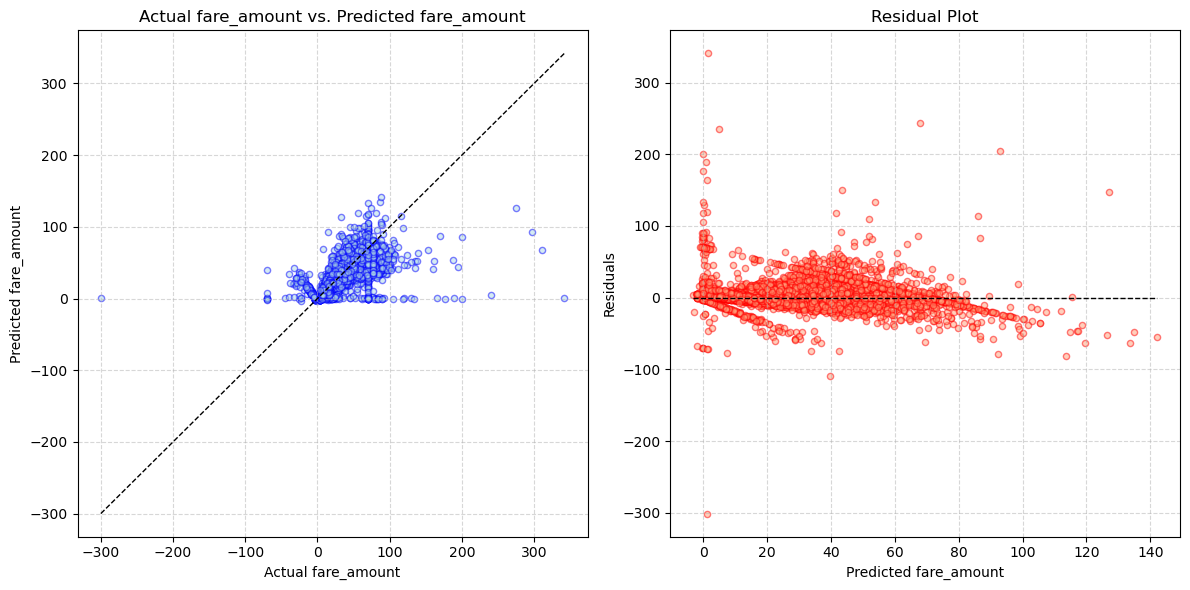

In [374]:
#I made scatter plot comparing actual and predicted fare_amount.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_y, predictions, color='lightblue', edgecolors='b', alpha=0.5, s=20)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='black', linestyle='--', linewidth=1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Actual fare_amount', fontsize=10)
plt.ylabel('Predicted fare_amount', fontsize=10)
plt.title('Actual fare_amount vs. Predicted fare_amount', fontsize=12)


#This is residual plot for the linear regression model.
residuals = test_y - predictions
plt.subplot(1, 2, 2)
plt.scatter(predictions, residuals, color='lightsalmon', edgecolors='r', alpha=0.5, s=20)
plt.hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='black', linestyle='--', linewidth=1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Predicted fare_amount', fontsize=10)
plt.ylabel('Residuals', fontsize=10)
plt.title('Residual Plot', fontsize=12)


plt.tight_layout()
plt.show()


### 3.3 Backward stepwise selection with validation [7 pts]

*   We use backward stepwise selection to analyze the impact of each feature on linear regression.
*   Each model measures the error by including all features but excluding one feature.
*   The features to be used for linear regression model training are "PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", “pickup hour”, “weekday”, and “trip duration”. The value to predict is "fare_amount".
*   We make validation set to search for one feature to remove.
*   The train dataset is divided into 4 parts, 75% is used for training, and 25% is used for validation.
*   Compare the results of Multiple Linear Regression models with one feature removed.



#### At first, I thought this was actually a problem of implementing backward stepwise selection, so I output an mse by subtracting one feature by one.

In [375]:
#I misunderstood the problem.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class FeatureSelection(Dataset):
    def __init__(self):
        super().__init__()
        self.train_x, self.train_y, self.test_x, self.test_y = self.getdata_linear_reg()
        
    def backward_stepwise_selection(self):
        train_x, val_x, train_y, val_y = train_test_split(self.train_x, self.train_y, test_size=0.25, random_state=100)
        
        feature_list = ["PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", "pickup_hour", "trip_duration", "weekday"]
        current_features = np.arange(train_x.shape[1]) #Initially an array that has an index of all features, but updates as features are removed one by one
        
        base_model = LinearRegression().fit(train_x, train_y) #base_model is a model which have all features
        base_pred = base_model.predict(val_x)
        previous_mse = mean_squared_error(val_y, base_pred) #Intially mse of base_model, but updates as features are removed one by one
        
        print(f"Mean Squared Error without excluding any feature: {previous_mse:.5f}")
        
        removed_features = []

        while len(current_features) > 1: # until there's at least one feature left
            mse_list = []
            for i, feature_to_remove in enumerate(current_features): # loop for current_features
                use_features = np.delete(current_features, i) # define the remaining features after excluding the i-th feature
                x_train_sub = train_x[:, use_features]
                x_val_sub = val_x[:, use_features]
                
                model = LinearRegression().fit(x_train_sub, train_y)
                pred = model.predict(x_val_sub)
                mse = mean_squared_error(val_y, pred)
                mse_list.append((mse, feature_to_remove)) # save as a tuple form in mse_list
            
            mse_list.sort(key=lambda x: x[0]) # the first value will be the least MSE, so we need to remove the corresponding feature_to_remove
            best_feature_to_remove = mse_list[0][1] # select the feature to remove with the smallest MSE
            current_features = np.delete(current_features, np.where(current_features == best_feature_to_remove))
            
            # finding and printing the remaining features
            remaining_features = [feature_list[i] for i in current_features]
            print(f"\nRemaining features: {remaining_features}")
            
            # calculating and printing the change in MSE
            change_in_mse = mse_list[0][0] - previous_mse
            previous_mse = mse_list[0][0] # Updating the previous MSE
            
            print(f"Removed feature: {feature_list[best_feature_to_remove]}, MSE: {mse_list[0][0]:.5f}, Change in MSE: {change_in_mse:.5f}")
            removed_features.append(feature_list[best_feature_to_remove])

if __name__ == "__main__":
    fs = FeatureSelection()
    fs.backward_stepwise_selection()


Mean Squared Error without excluding any feature: 95.65114

Remaining features: ['PU_longitude', 'PU_latitude', 'DO_longitude', 'pickup_hour', 'trip_duration', 'weekday']
Removed feature: DO_latitude, MSE: 95.65196, Change in MSE: 0.00081

Remaining features: ['PU_longitude', 'PU_latitude', 'DO_longitude', 'trip_duration', 'weekday']
Removed feature: pickup_hour, MSE: 95.66400, Change in MSE: 0.01204

Remaining features: ['PU_longitude', 'PU_latitude', 'trip_duration', 'weekday']
Removed feature: DO_longitude, MSE: 95.67786, Change in MSE: 0.01386

Remaining features: ['PU_latitude', 'trip_duration', 'weekday']
Removed feature: PU_longitude, MSE: 95.82012, Change in MSE: 0.14226

Remaining features: ['trip_duration', 'weekday']
Removed feature: PU_latitude, MSE: 95.93512, Change in MSE: 0.11500

Remaining features: ['trip_duration']
Removed feature: weekday, MSE: 96.32353, Change in MSE: 0.38841


#### I belatedly realized that the problem was not to implement the actual backward stepwise selection, but to just compare the performance of taking away each feature, so I fixed the code again. You can see the code below.

In [376]:
#I rewrote the code after understanding the problem correctly.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class FeatureSelection(Dataset):
    def __init__(self):
        super().__init__()
        self.train_x, self.train_y, self.test_x, self.test_y = self.getdata_linear_reg()

    def backward_stepwise_selection(self):
        train_x, val_x, train_y, val_y = train_test_split(self.train_x, self.train_y, test_size=0.25, random_state=100)
        
        feature_list = ["PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", "pickup_hour", "trip_duration", "weekday"]
        
        base_model = LinearRegression().fit(train_x, train_y)
        base_pred = base_model.predict(val_x)
        base_mse = mean_squared_error(val_y, base_pred)
        base_r2=r2_score(val_y, base_pred)
        
        print(f"Mean Sqaured error without excluding any feature: {base_mse:5f}")
        print(f"R^2 without excluding any feature: {base_r2:5f}")
        for i in range(train_x.shape[1]):
            x_train_sub = np.delete(train_x, i, axis=1)
            x_val_sub = np.delete(val_x, i, axis=1)
            
            model = LinearRegression().fit(x_train_sub, train_y)
            pred = model.predict(x_val_sub)

            mse = mean_squared_error(val_y, pred)
            change_in_mse = mse - base_mse
            r2 = r2_score(val_y, pred)
            

            print(f"\n Removed feature: {feature_list[i]}\n Mean Squared Error: {mse:5f}, Change in MSE : {change_in_mse:.5f}, R^2: {r2:5f}") 

if __name__ == "__main__":
    fs = FeatureSelection()
    fs.backward_stepwise_selection()

Mean Sqaured error without excluding any feature: 95.651145
R^2 without excluding any feature: 0.664587

 Removed feature: PU_longitude
 Mean Squared Error: 95.792247, Change in MSE : 0.14110, R^2: 0.664092

 Removed feature: PU_latitude
 Mean Squared Error: 95.858557, Change in MSE : 0.20741, R^2: 0.663859

 Removed feature: DO_longitude
 Mean Squared Error: 95.666044, Change in MSE : 0.01490, R^2: 0.664534

 Removed feature: DO_latitude
 Mean Squared Error: 95.651956, Change in MSE : 0.00081, R^2: 0.664584

 Removed feature: pickup_hour
 Mean Squared Error: 95.663193, Change in MSE : 0.01205, R^2: 0.664544

 Removed feature: trip_duration
 Mean Squared Error: 282.977053, Change in MSE : 187.32591, R^2: 0.007703

 Removed feature: weekday
 Mean Squared Error: 96.056313, Change in MSE : 0.40517, R^2: 0.663166


#### So if you see the output of this function above, you can realize that the least change in the MSE means that the removed feature is least significant.

#### Therefore, the 'DO_latitude' is the least significant feature, and the 'trip duration' is the most significant feature,
***

### 4. Multiple Linear regression with L1, L2 regularization [6 pts]



1.   Apply regularization to multiple linear regression models.
  *   Create a model using L1 and L2 regularization, respectively.
  *   The features to be used for linear regression model training are "PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", “pickup hour”, “weekday”, and “trip duration”.
  *   The value to predict is "fare_amount".

2.   Compare it to the basic multiple linear regression model without L1 and L2 regularization.


In [377]:
# Do a multiple linear regression with L1, L2 regularization, then analyze your results.
# Compare with basic multiple linear regression model

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

dataset = Dataset()
train_x, train_y, test_x, test_y = dataset.getdata_linear_reg()

# Let's apply regularization to multiple linear regression models
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Basic Multiple Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(train_x_scaled, train_y)
predictions_lr = model_lr.predict(test_x_scaled)
mse_test_lr = mean_squared_error(test_y, predictions_lr)
print(f"Mean Squared Error in Basic Multiple Linear Regression model: {mse_test_lr:5f}")

# Lasso Regression Model (L1 regularization)
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(train_x_scaled, train_y)
predictions_lasso = model_lasso.predict(test_x_scaled)
mse_test_lasso = mean_squared_error(test_y, predictions_lasso)
print(f"Mean Squared Error in Lasso Regression Model: {mse_test_lasso:5f}")

# Ridge Regression Model (L2 regularization)
model_ridge = Ridge(alpha=1000) #I found that MSE decreases when I incresed alpha, so I modulated alpha.
model_ridge.fit(train_x_scaled, train_y)
predictions_ridge = model_ridge.predict(test_x_scaled)
mse_test_ridge = mean_squared_error(test_y, predictions_ridge)
print(f"Mean Squared Error in Ridge Regression Model {mse_test_ridge:5f}")



Mean Squared Error in Basic Multiple Linear Regression model: 94.281355
Mean Squared Error in Lasso Regression Model: 94.282443
Mean Squared Error in Ridge Regression Model 94.141548


L1 normalization in the Lasso regression doesn't seem to significantly enhance the model's performance, indicated by an MSE akin to that of the base model. This could suggest that most features are significant for predicting the model or, alternatively, the chosen alpha parameter may not be optimal for this dataset.

L2 normalization in the Ridge regression shows the lowest MSE value. This could mean that Ridge regression is performing slightly better for this problem. However, I believe that I need to deal with tuning alpha to find the best alpha parameter.

As a result, the Ridge Regression model with the relatively lowest MSE value appears to be the best model for this problem.
However, because the values are quite similar, I believe that all models are performing similarly.

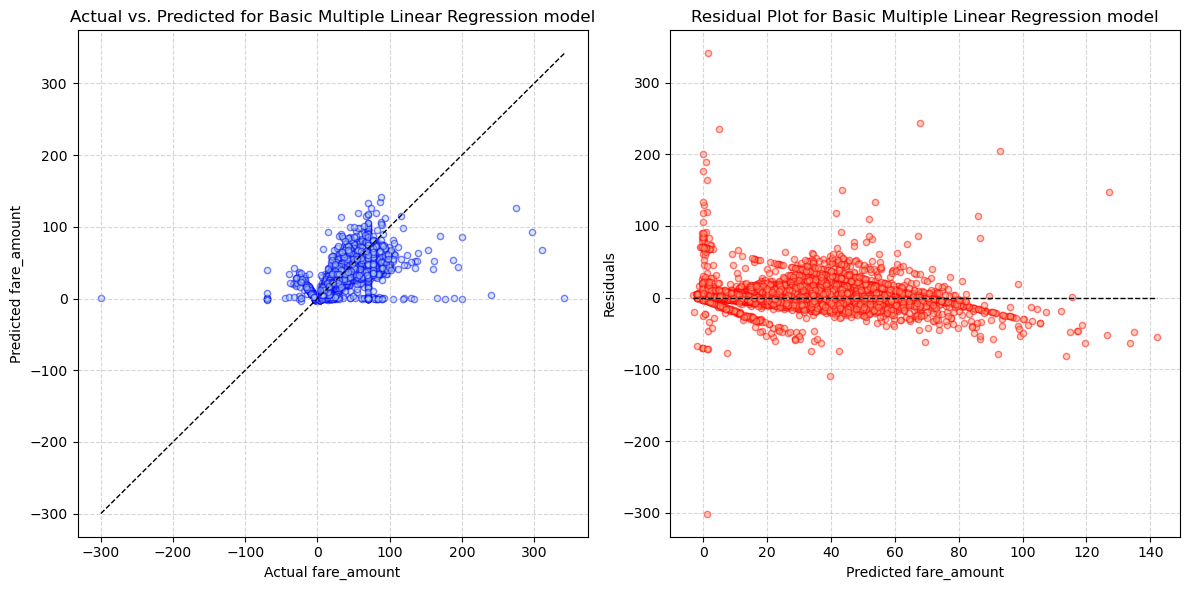

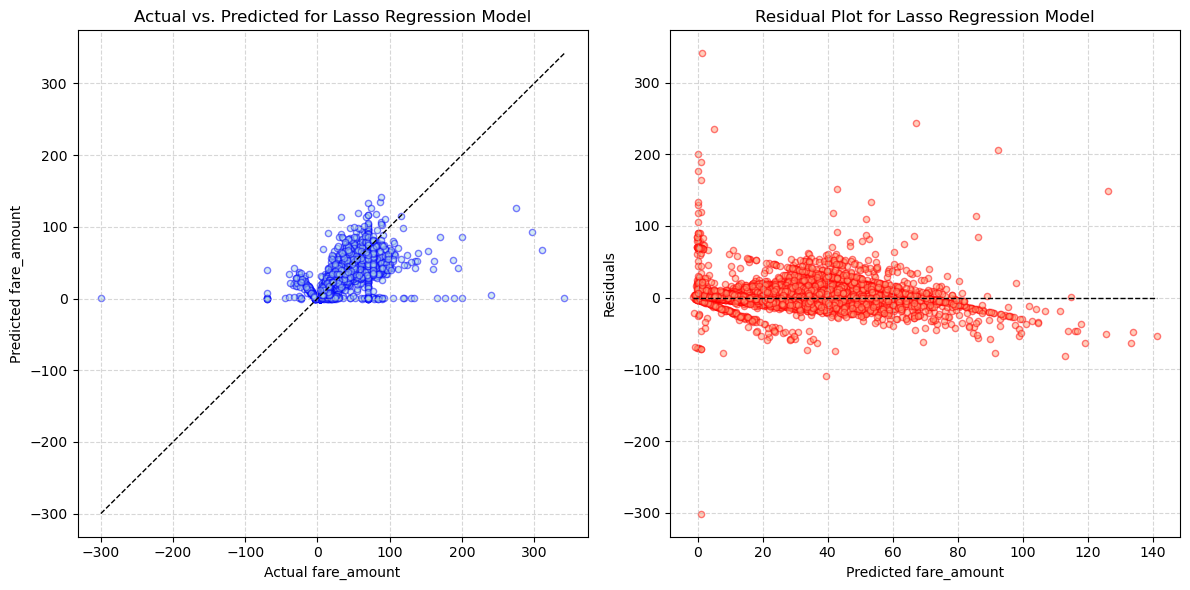

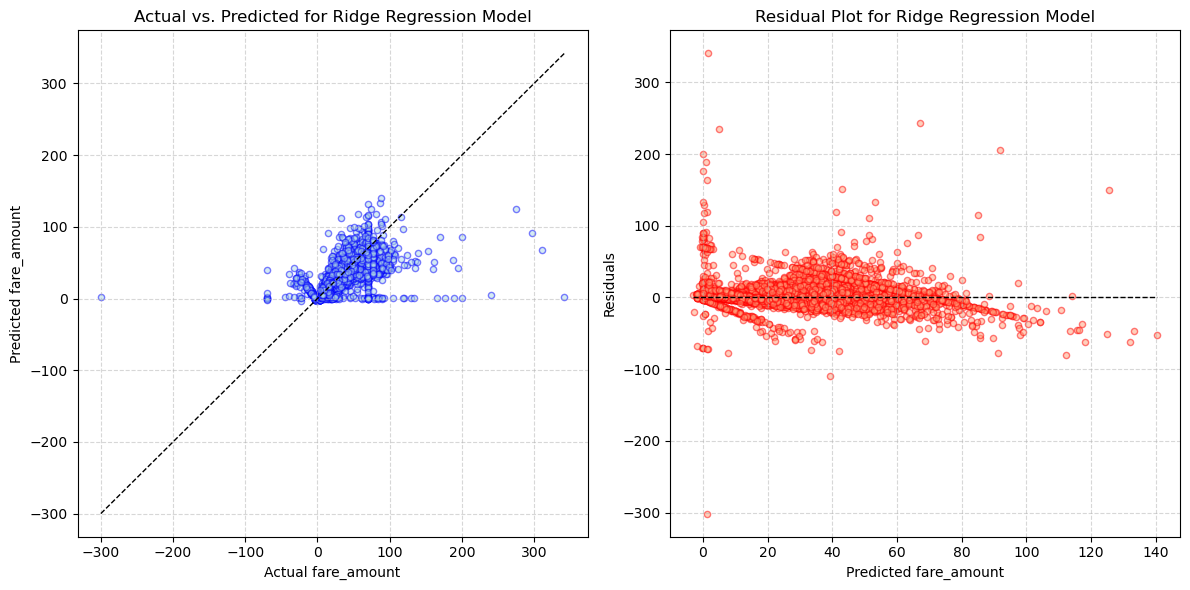

In [378]:
def plot_scatter_and_residual(test_y, predictions, model_name):
    plt.figure(figsize=(12, 6))

    # Scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(test_y, predictions, color='lightblue', edgecolors='b', alpha=0.5, s=20)
    plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='black', linestyle='--', linewidth=1.0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlabel('Actual fare_amount', fontsize=10)
    plt.ylabel('Predicted fare_amount', fontsize=10)
    plt.title(f'Actual vs. Predicted for {model_name}', fontsize=12)

    # Residual plot
    residuals = test_y - predictions
    plt.subplot(1, 2, 2)
    plt.scatter(predictions, residuals, color='lightsalmon', edgecolors='r', alpha=0.5, s=20)
    plt.hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='black', linestyle='--', linewidth=1.0)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlabel('Predicted fare_amount', fontsize=10)
    plt.ylabel('Residuals', fontsize=10)
    plt.title(f'Residual Plot for {model_name}', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_scatter_and_residual(test_y, predictions_lr, "Basic Multiple Linear Regression model")
plot_scatter_and_residual(test_y, predictions_lasso, "Lasso Regression Model")
plot_scatter_and_residual(test_y, predictions_ridge, "Ridge Regression Model")

